<a href="https://colab.research.google.com/github/shi-star/Lin_reg_car_pred_/blob/main/Lin_reg_car_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement
A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

Which variables are significant in predicting the price of a car.
How well those variables describe the price of a car Based on various market surveys.
the consulting firm has gathered a large data set of different types of cars across the America market.

# Business Goal
We are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

In [217]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [218]:
path = 'https://drive.google.com/file/d/1zbdO6GQHhD8OvUOONGDmahTKG7ZgNU7q/view?usp=sharing'

**DataSet Information**:<br>
**Car_ID**: Unique id of each observation (Interger)

**Symboling**: Its assigned insurance risk rating, A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.(Categorical)

**CarNam**e: Name of car company (Categorical)

**fueltype**: Car fuel type i.e gas or diesel (Categorical)

**aspiration**: Aspiration used in a car (Categorical)

**doornumber**: Number of doors in a car (Categorical)

**carbody**: body of car (Categorical)

**drivewheel**: type of drive wheel (Categorical)

**enginelocation**: Location of car engine (Categorical)

**wheelbase**: Weelbase of car (Numeric)

**carlength**: Length of car (Numeric)

**carwidth**: Width of car (Numeric)

**carheight**: height of car (Numeric)

**curbweight**: The weight of a car without occupants or baggage. (Numeric)

**enginetype**: Type of engine. (Categorical)

**cylindernumber**: cylinder placed in the car (Categorical)

**enginesize**: Size of car (Numeric)

**fuelsystem**: Fuel system of car (Categorical)

**boreratio**: Boreratio of car (Numeric)

**stroke**: Stroke or volume inside the engine (Numeric)

**compressionratio**: compression ratio of car (Numeric)

**horsepower**: Horsepower (Numeric)

**peakrpm**: car peak rpm (Numeric)

**citympg**: Mileage in city (Numeric)

**highwaympg**: Mileage on highway (Numeric)

**price**(Dependent variable): Price of car (Numeric)

####  Let's Start

##### First we will import the important libaries

In [219]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [220]:
path = '/content/drive/MyDrive/CarPrice_project.csv'

##### Now we will import the data 

In [221]:
df = pd.read_csv(path)

##### Now we will check the data 

In [222]:
pd.set_option('display.max_columns', None)

In [223]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


##### Now we will check the shape of the data 

In [224]:
df.shape  ##### So we have 205 rows and 26 columns

(205, 26)

##### Now we will get some info of the data 

In [225]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

##### Here we can see we have 8 float type columns, 6 int type and 10 categorical columns
##### Now we will check the missing values once however impute them later if any 

In [226]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

##### That's awesome there is no missing values in any column
##### Now we will get a summary of data 

In [227]:
df.describe(include='all')

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205,205,205,205,205,205,205,205.000000,205.000000,205.000000,205.000000,205.000000,205,205,205.000000,205,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
unique,NaN,NaN,147,2,2,2,5,3,2,NaN,NaN,NaN,NaN,NaN,7,7,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,peugeot 504,gas,std,four,sedan,fwd,front,NaN,NaN,NaN,NaN,NaN,ohc,four,NaN,mpfi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,6,185,168,115,96,120,202,NaN,NaN,NaN,NaN,NaN,148,159,NaN,94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,103.000000,0.834146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,174.049268,65.907805,53.724878,2555.565854,NaN,NaN,126.907317,NaN,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,12.337289,2.145204,2.443522,520.680204,NaN,NaN,41.642693,NaN,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,141.100000,60.300000,47.800000,1488.000000,NaN,NaN,61.000000,NaN,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,166.300000,64.100000,52.000000,2145.000000,NaN,NaN,97.000000,NaN,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,173.200000,65.500000,54.100000,2414.000000,NaN,NaN,120.000000,NaN,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,183.100000,66.900000,55.500000,2935.000000,NaN,NaN,141.000000,NaN,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000


## Let's do the Univariate Analysis now




Now let's analyse the categorical data

In [228]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [229]:
df.select_dtypes(include = 'object')

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,alfa-romero giulia,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero stelvio,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi 100 ls,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi 100ls,gas,std,four,sedan,4wd,front,ohc,five,mpfi
...,...,...,...,...,...,...,...,...,...,...
200,volvo 145e (sw),gas,std,four,sedan,rwd,front,ohc,four,mpfi
201,volvo 144ea,gas,turbo,four,sedan,rwd,front,ohc,four,mpfi
202,volvo 244dl,gas,std,four,sedan,rwd,front,ohcv,six,mpfi
203,volvo 246,diesel,turbo,four,sedan,rwd,front,ohc,six,idi


<b><i> As it is a categorical variable, we should check the unique values in it.</i></b>

In [230]:
df['CarName'].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [231]:
df['company'] = df['CarName'].str.split(' ', expand = True)[0]
df['company'] = df['company'].replace({'toyouta': 'Toyota','vw':'Volkswagen','vokswagen':'Volkswagen',
                                                      'maxda':'Mazda','porcshce':'Porsche'})
df['company'] = df['company'].str.title()
df['company'].value_counts()

Toyota         32
Nissan         18
Mazda          17
Mitsubishi     13
Honda          13
Subaru         12
Volkswagen     12
Peugeot        11
Volvo          11
Dodge           9
Buick           8
Bmw             8
Plymouth        7
Audi            7
Saab            6
Porsche         5
Isuzu           4
Chevrolet       3
Jaguar          3
Alfa-Romero     3
Renault         2
Mercury         1
Name: company, dtype: int64

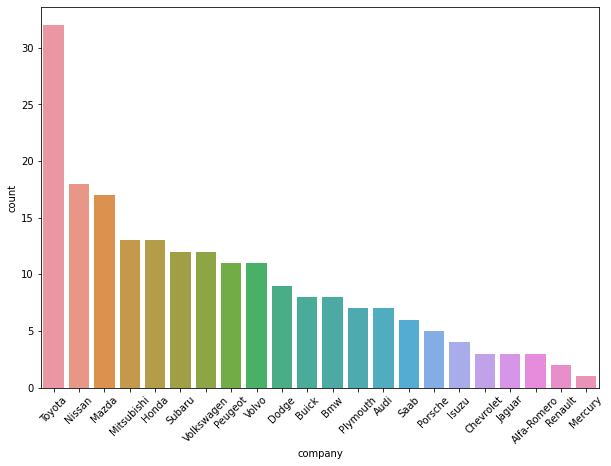

In [232]:
plt.figure(figsize=(10,7))
sns.countplot(x='company', data = df, order=df['company'].value_counts().index)
plt.xticks(rotation=45)
plt.show()

Here we can see that Toyota is the most produced car.So we can say it is most demanding car. As even the second top most is very far from the toyota. we can also see Mercury is the least produced car.<br>
<b><i> Now we will make the countplot for all the categorical variables. 

fueltype


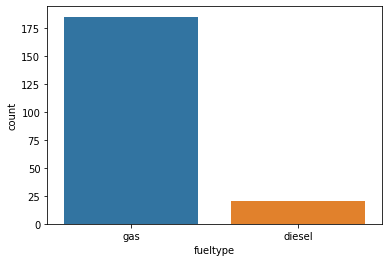

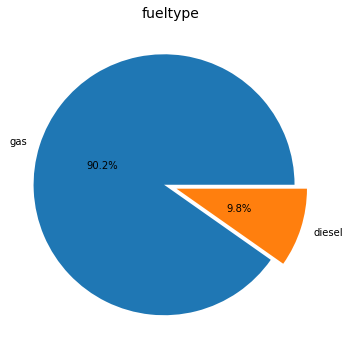

aspiration


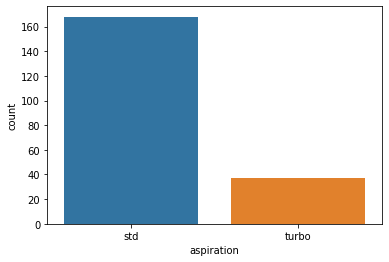

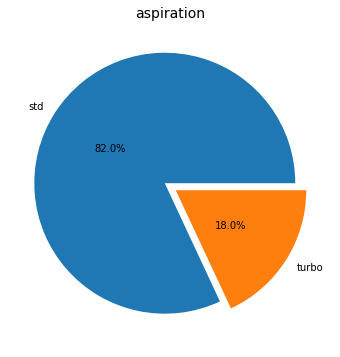

doornumber


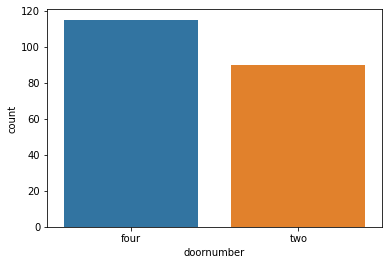

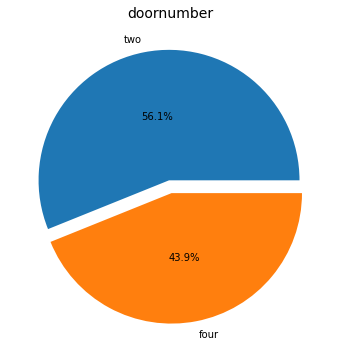

carbody


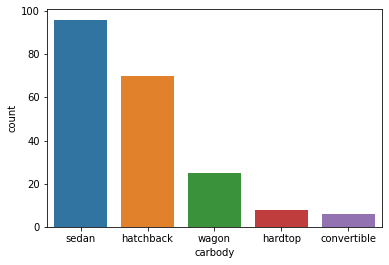

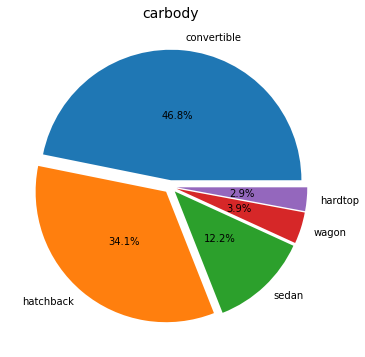

drivewheel


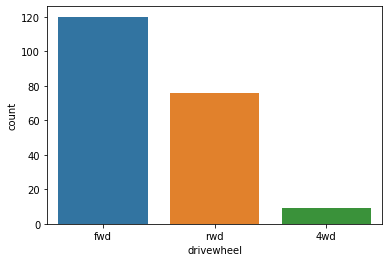

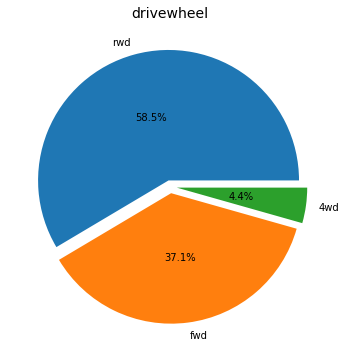

enginelocation


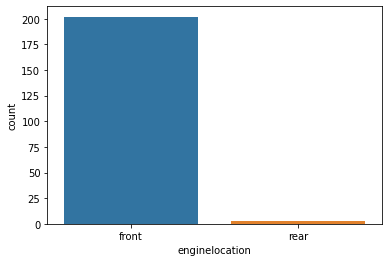

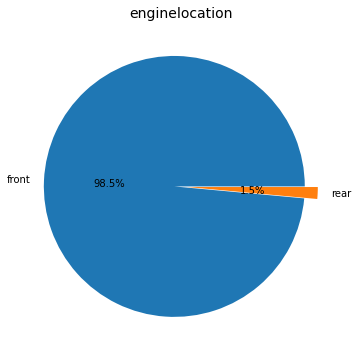

enginetype


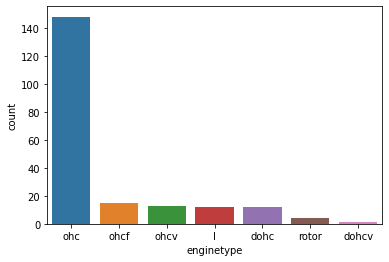

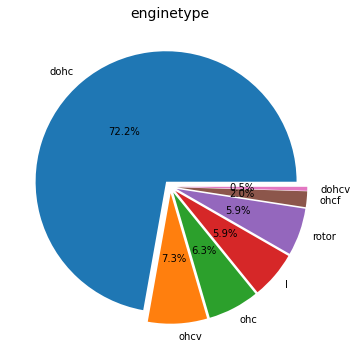

cylindernumber


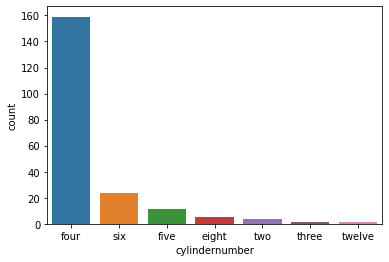

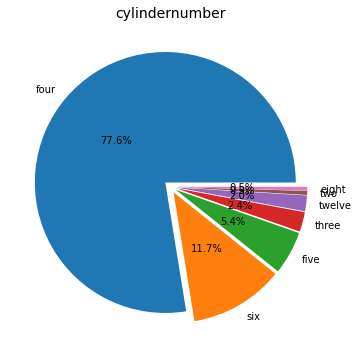

fuelsystem


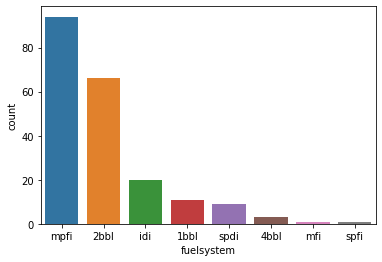

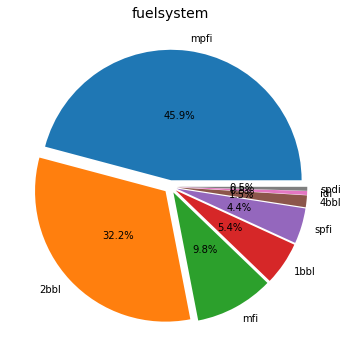

In [233]:
 list = ['fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem']
for i in list:
    print(i)
   
    sns.countplot(x=i, data=df, order= df[i].value_counts().index)
    counts= df[i].value_counts()
    p=counts/len(df[i])
    pie, ax = plt.subplots(figsize=[10,6])
    labels=  df[i].unique()
    explode =  df[i].nunique()
    plt.pie(x=p ,autopct="%.1f%%", pctdistance=0.5, labels=labels , explode = [0.05]*explode)
    plt.title(i, fontsize=14)
    plt.show()
    

### My Observations from the univariate analysis of the categorical columns. 
<ol><li><b>Fueltype : </b> We can see mostly cars have Gas fueltype in them. As 90.2% cars has 'gas' type of fueltype. so  'Gas' fueltype cars are produced mostly.</li>
    <li><b>Aspiration: </b> We can see cars having 'std' aspiration are 82.0% and 'turbo' are 18%. so mostly car produced with 'std' aspiration.</li>
    <li><b>DoorNumber : </b> We can see cars having 'two' doornumbers are 56.1% and 'four' are 43.9%. So here we can say that people prefer both type of cars almost equally.</li>
    <li><b>Carbody : </b> We can see almost 50% cars are produced with 'convertible' carbody. And the second most produced is with 'hatchback' carbody with 34.1% . And rest of the cars are produced with other type of carbody.</li>
    <li><b>Drivewheel : </b> We can see 58.5% are produced with 'rwd' and the second most is 'fwd' with 37.1% but the least is '4wd' with 4.4%.</li>
    <li><b>Enginelocation : </b> We can see almost 99% cars have enginge in 'front'. there are only a few cars produced having engine located in 'rear' location.</li>
    <li><b>Enginetype : </b> We can see that 72.2% cars are produced with 'dohc' engine. Rest of the cars have other engine type which are between 5-7% of each engine type. However the least engine used is 'dohcv'.</li>
    <li><b>Cylinder : </b> we can see almost 80% cars have 4 cylinders. And only 12% cars have 6 cylinders. While only 0.5% cars are produced with 8 cylinders.</li>
    <li><b>Fuelsystem : </b> We can see that almost 50% cars are produced with 'mpfi' fuelsystem. After that 32.2% cars are produced with '2bbl' fuelsystem. While 0.5% are produced with 'spfi' fuelsystem.

## Now the Univariate Analysis of continous variables.

In [234]:
df.select_dtypes(include=np.number)

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27,22470.0


<b><i> Lets remove the 'car_ID' columns.

In [235]:
df_num = df.drop(columns=df[['car_ID']], inplace= True)


In [236]:
df_num= df.select_dtypes(include=np.number)

In [237]:
df_num.columns

Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [238]:
import warnings
warnings.filterwarnings("ignore")

In [239]:
from scipy.stats import skew

symboling
skewness : 0.20952469094997359
mean : 0.8341463414634146
median : 1.0


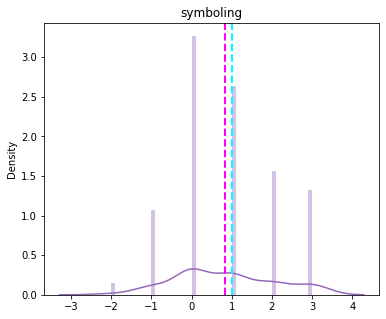

wheelbase
skewness : 1.042513612401581
mean : 98.75658536585378
median : 97.0


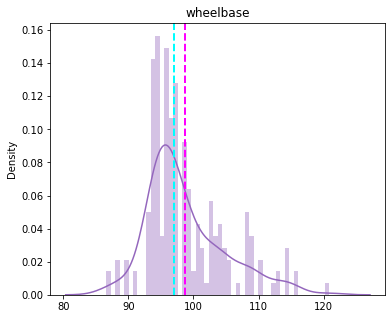

carlength
skewness : 0.15481031885453517
mean : 174.04926829268305
median : 173.2


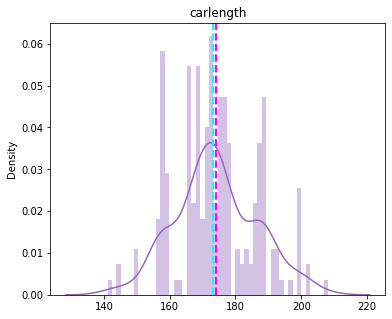

carwidth
skewness : 0.8973753485201392
mean : 65.90780487804875
median : 65.5


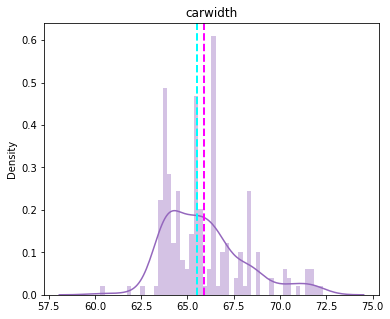

carheight
skewness : 0.06265991683394276
mean : 53.724878048780525
median : 54.1


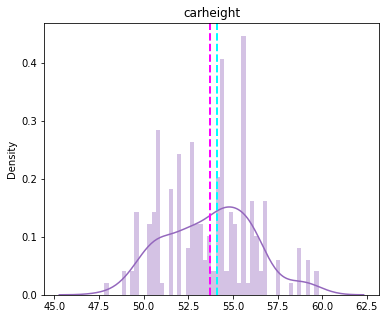

curbweight
skewness : 0.676402180083416
mean : 2555.5658536585365
median : 2414.0


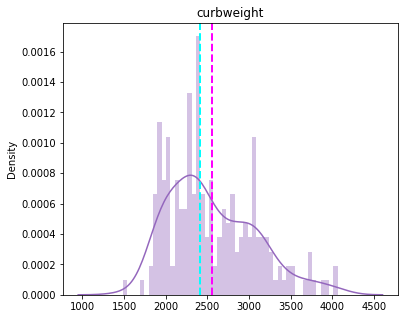

enginesize
skewness : 1.9333748457840114
mean : 126.90731707317073
median : 120.0


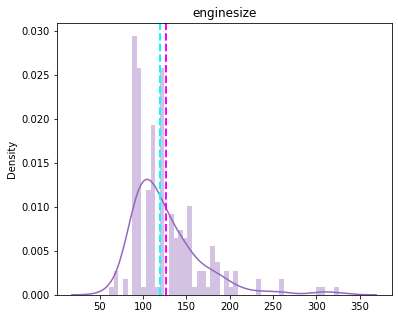

boreratio
skewness : 0.02000863132222015
mean : 3.3297560975609772
median : 3.31


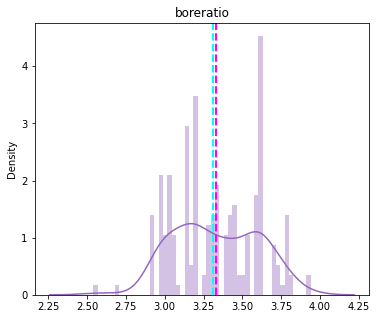

stroke
skewness : -0.6846476670384662
mean : 3.255414634146336
median : 3.29


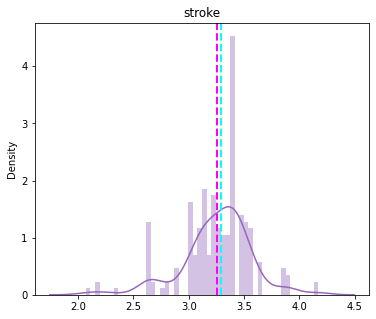

compressionratio
skewness : 2.5917196238579114
mean : 10.142536585365855
median : 9.0


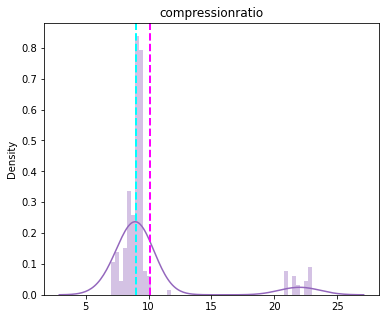

horsepower
skewness : 1.3950064255509182
mean : 104.1170731707317
median : 95.0


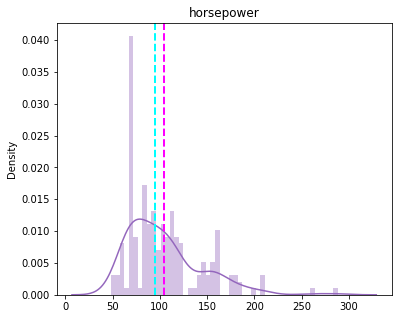

peakrpm
skewness : 0.07460765890035755
mean : 5125.121951219512
median : 5200.0


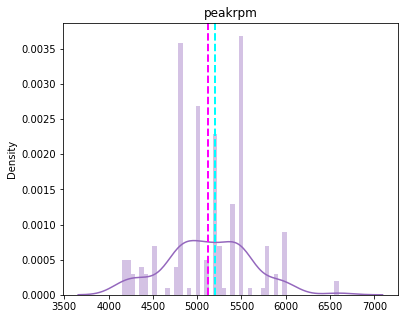

citympg
skewness : 0.6588377533622138
mean : 25.21951219512195
median : 24.0


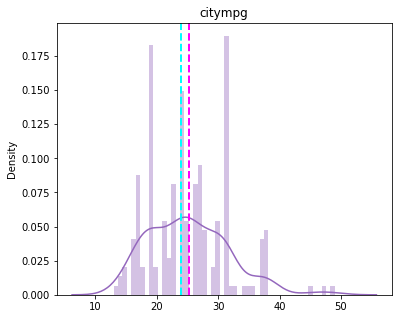

highwaympg
skewness : 0.5360379305163596
mean : 30.75121951219512
median : 30.0


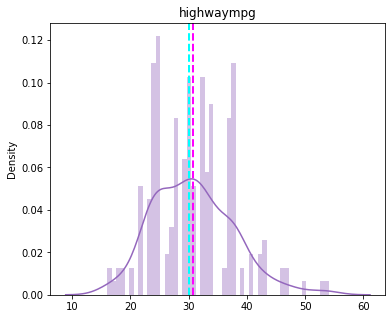

price
skewness : 1.7646442265113236
mean : 13276.710570731706
median : 10295.0


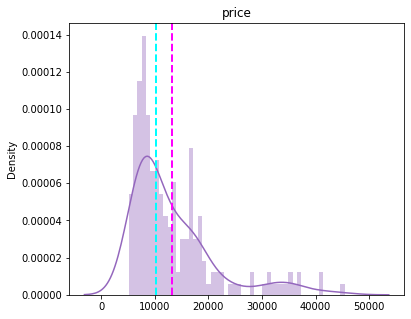

In [240]:
for col in df_num:
    print(col)
    print('skewness :', skew(df_num[col]))
    print('mean :', df_num[col].mean())
    print('median :', df_num[col].median())
  
    fig = plt.figure(figsize=(6, 5))
    ax = fig.gca()
    feature = df_num[col]
    sns.distplot(x=feature , bins=50, hist= True, color ='#9467bd')
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
    plt.show()

In [241]:
Highly_skewed_columns = []
for i in df_num:
    skewness = skew(df_num[i])
    if skewness <-1 or skewness > 1:
        Highly_skewed_columns.append(i)
print('Highly_skewed_columns :' ,Highly_skewed_columns)


Highly_skewed_columns : ['wheelbase', 'enginesize', 'compressionratio', 'horsepower', 'price']


## My Observations from above distplot of continous variables.
<b>We have skewness calculated</b>.<br> 
As it is generally believed that the skewness between -0.5 to 0.5 is apporx. symmetric, so that can be considered as normally distributed.<br>
The skewness between -1 and 1 is moderately skewed.<br>
The skewness less than -1 and more than 1 is highly skewed.<br>
<b>We can see that the magenta line is our mean of the column and blue line is median.</b><br>
If right skewed = mean>median<br>
If left skewed = median>mean<br>
If normally distributed = mean= median<br>
<b> We can see that 'wheelbase', 'enginesize', 'compressionratio', 'horsepower' are highly skewed columns. </b> .

## **Now We will check if there are outliers in continous variables. **

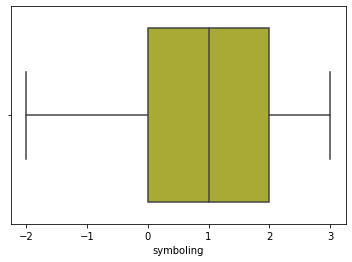

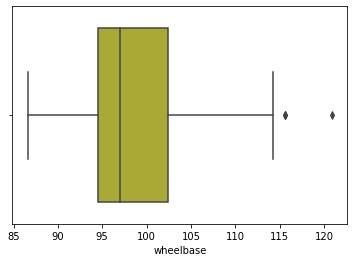

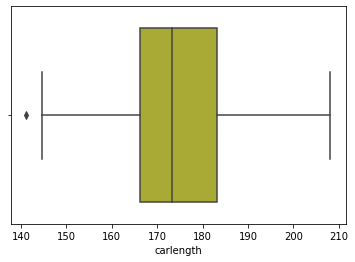

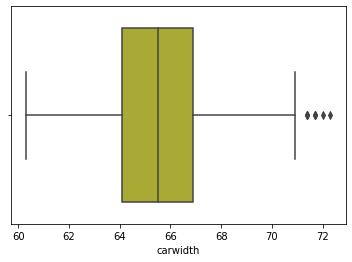

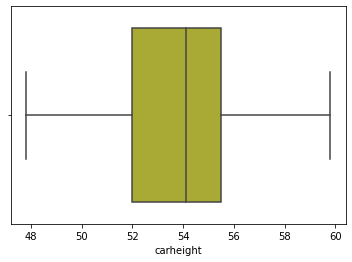

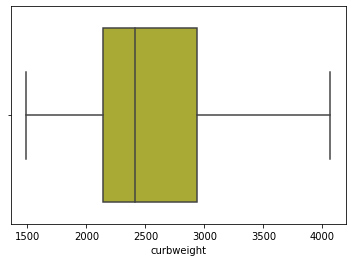

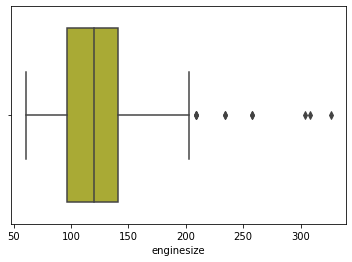

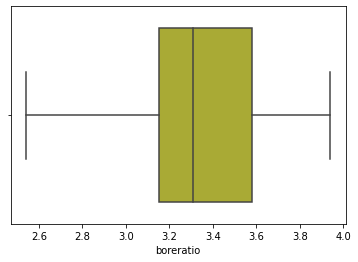

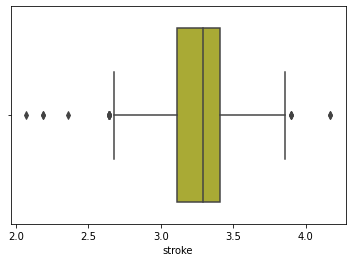

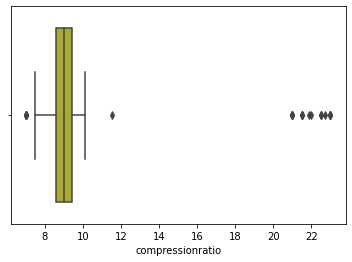

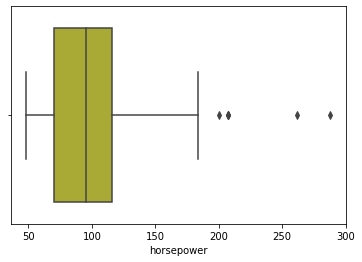

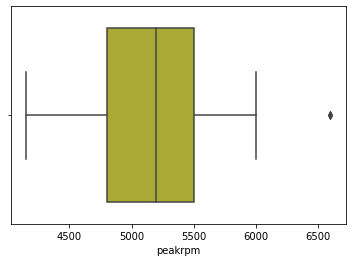

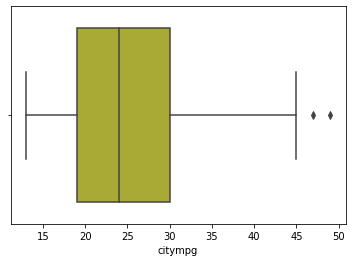

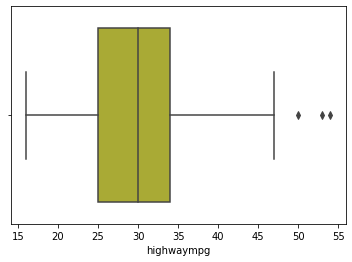

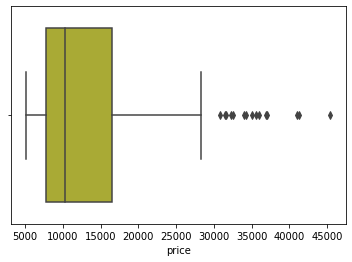

In [242]:
for i in df_num:
    sns.boxplot(x=i, data=df, color= '#bcbd22')
    plt.show()

Here we can see that many columns have outliers in them. We will surely treat them after bivariate analysis. 
Now as we have see the unique values in CarName, so that is quite messy. so we have categorised them as their company name by using groupby function. 

<Figure size 1440x432 with 0 Axes>

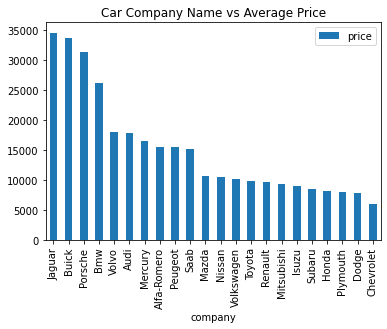

In [243]:
plt.figure(figsize=(20, 6))

df_autox = pd.DataFrame(df.groupby(['company'])['price'].mean().sort_values(ascending = False))
df_autox.plot.bar()
plt.title('Car Company Name vs Average Price')
plt.show()

**Here we can see the most expensive car is 'Jaguar', top 3 are 'Buick', 'porsche', 'bmw'. However the inexpensive cars are almost in same range.**

## Now let's start the Bivariate Analysis
Here we are analysing the categorical variable with the target variable

fueltype


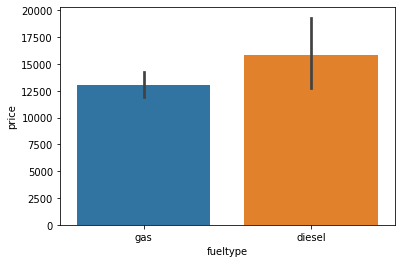

aspiration


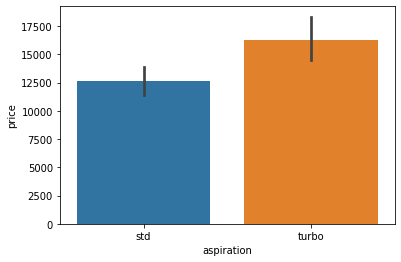

doornumber


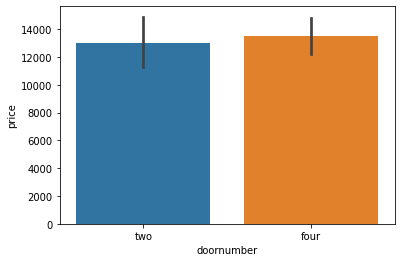

carbody


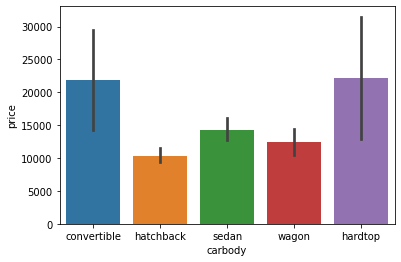

drivewheel


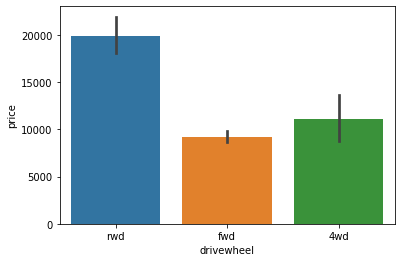

enginelocation


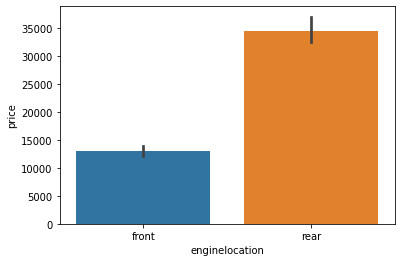

enginetype


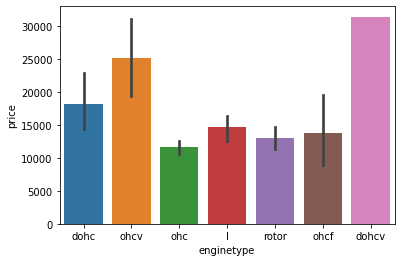

cylindernumber


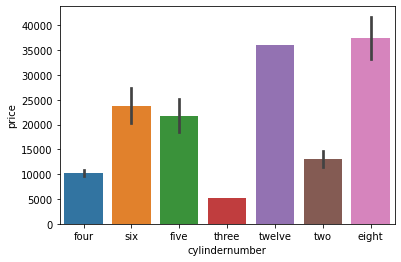

fuelsystem


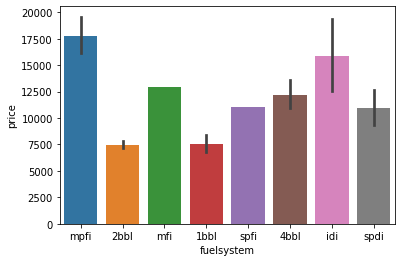

In [244]:
list = ['fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem']
for i in list:
    print(i)
    sns.barplot(x=i, y = 'price', data = df )
    plt.show()

fueltype


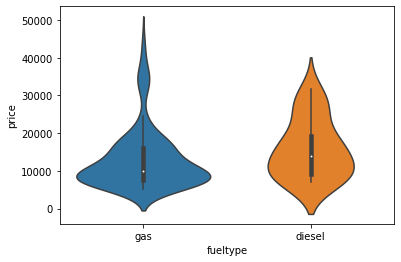

aspiration


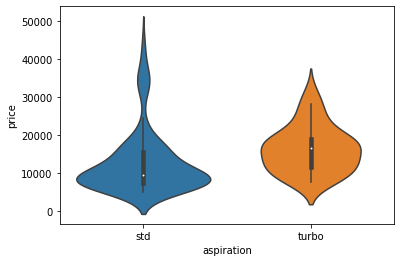

doornumber


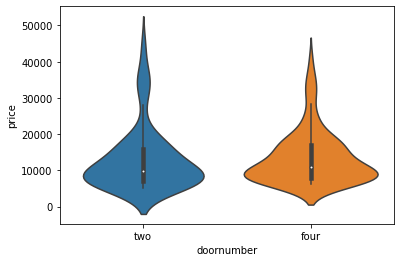

carbody


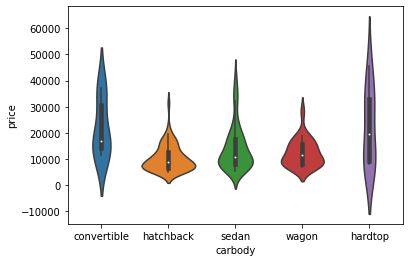

drivewheel


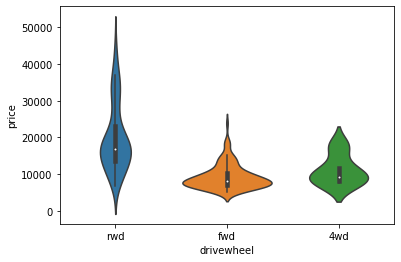

enginelocation


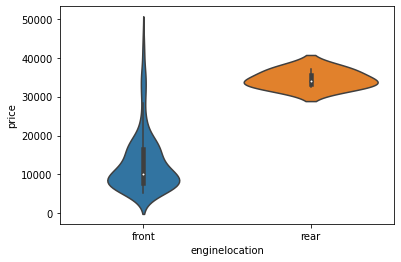

enginetype


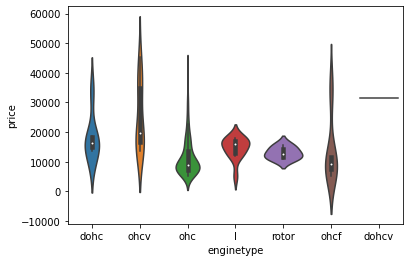

cylindernumber


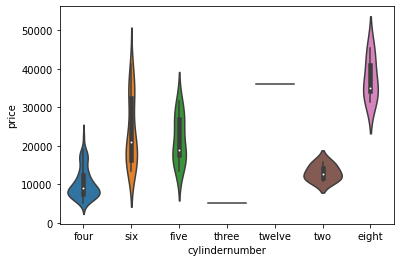

fuelsystem


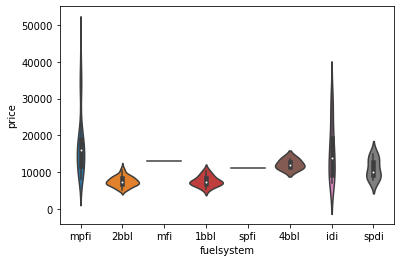

In [245]:
list = ['fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem']
for i in list:
    print(i)
    sns.violinplot(x=i, y = 'price', data = df)
    plt.show()

fueltype


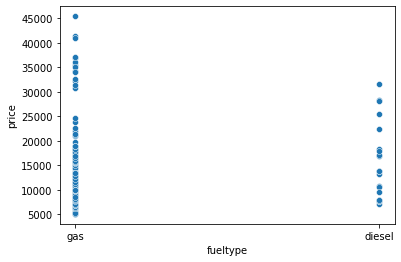

aspiration


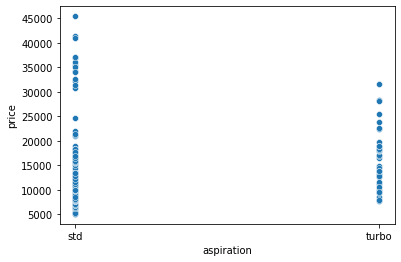

doornumber


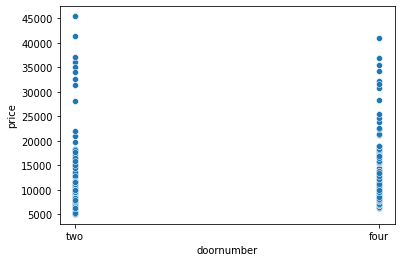

carbody


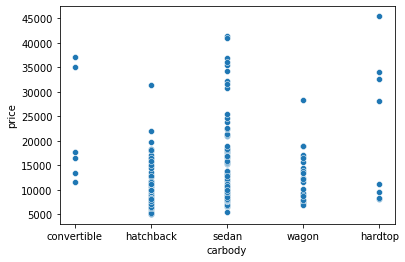

drivewheel


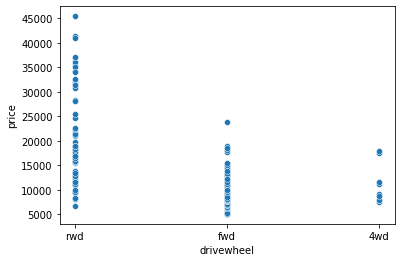

enginelocation


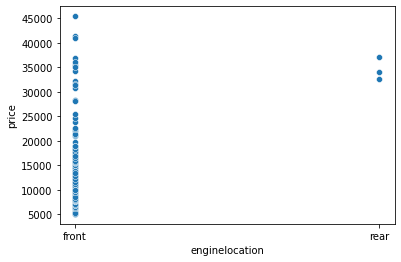

enginetype


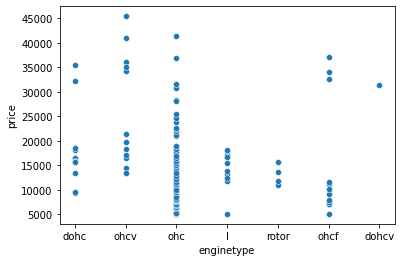

cylindernumber


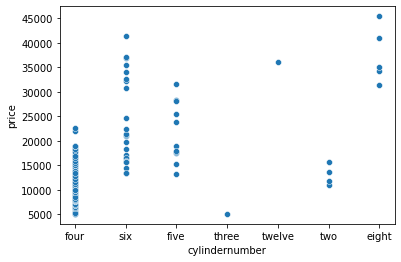

fuelsystem


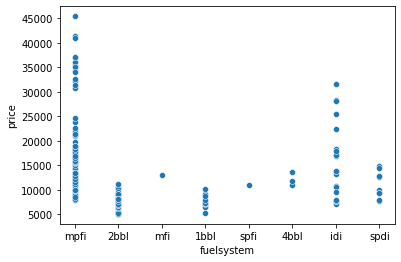

In [246]:
for i in list:
    print(i)
    sns.scatterplot(x=i, y = 'price', data=df)
    plt.show()

### My Observations: 
<ol><li>We can see see that the most of the cars having 'Gas' fueltype are  cheaper than that of the "diesel", this might be the reason 90% cars are produced with gas fueltype. as we saw above during univariate analysis. Although there are a few cars which are upto 50000 USD and have 'gas' fueltype.
</li>
<li>We can see that most of the cars having 'std' aspiration are cheaper than the turbo which results more produced cars using 'std' aspiration.</li>
<li>We can see that number of doors in cars does not impact the price much. so we can remove this feature. </li>
<li>From the carbody type, we can see most of cars having 'hatchback', 'sedan', 'wagon' are in lower range. Hower 'hardtop' makes difficult to say anything 
about cars having hardtop body, as it goes from lower range to the maximum range.</li>
<li>We can see cars having 'fwd'are in the cheapest range, and are second mostly produced cars. </li>
<li>We can see that Engine location impacts the price a lot. As the cars having engine in 'rear' location are only in higher range. That's the reason 99% cars are produced with engine in 'front'.However the data is biased as 99% have front so we can remove this as well.</li>
<li> We can see engine almost all the enginer type are from lower range to higher range expect the 'dohcv', which are only in higher range.that's why the cars with 'dohcv produced only 0.5%</li>
<li>Cars having four cylinder are in cheaper range. while cars having eight cylinders are in higher range , and produced only 0.5% </li>
<li>Cars having '2bbl', 'lbbl', are in lower range, we can see costlier cars have 'mpfi' fuelsystem.</li>

My decisions on bivariate analysis of categorical columns: <br>
1.We can drop the 'doornumber' columns, as there is no difference in the price according to the doornumber. so we don't get any info from doornumber.<br> 
2.We can drop the 'enginelocation' columns, as we can see it has 99% data of only one category. so it does not provide any info.<br>
3.We can see in 'fuelsystem' there are 3 types of categories, which have only 1-3 observations so we will make a category as 'others' for all these categories.'mfi', 'spfi', '4bbl'.

In [247]:
df1 = df.drop(columns= df[['doornumber','enginelocation']], axis= 1, inplace = True)

In [248]:
df1= pd.DataFrame(df)

In [249]:
df1.head()

,symboling,CarName,fueltype,aspiration,carbody,drivewheel,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,company
0,3,alfa-romero giulia,gas,std,convertible,rwd,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,Alfa-Romero
1,3,alfa-romero stelvio,gas,std,convertible,rwd,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,Alfa-Romero
2,1,alfa-romero Quadrifoglio,gas,std,hatchback,rwd,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,Alfa-Romero
3,2,audi 100 ls,gas,std,sedan,fwd,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,Audi
4,2,audi 100ls,gas,std,sedan,4wd,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,Audi


In [250]:
df_encode = {"fueltype":{"diesel":1,"gas":0},
                 "aspiration":{"turbo":1,"std":0},
                 
                 "drivewheel":{"fwd":0,"4wd":0,"rwd":1},
                 "cylindernumber":{"four": 4, "six": 6, "five": 5, "eight": 8,
                                  "two": 2, "twelve": 12, "three":3 }}

df1 = df1.replace(df_encode)

In [251]:
df1.head()

,symboling,CarName,fueltype,aspiration,carbody,drivewheel,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,company
0,3,alfa-romero giulia,0,0,convertible,1,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,Alfa-Romero
1,3,alfa-romero stelvio,0,0,convertible,1,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,Alfa-Romero
2,1,alfa-romero Quadrifoglio,0,0,hatchback,1,94.5,171.2,65.5,52.4,2823,ohcv,6,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,Alfa-Romero
3,2,audi 100 ls,0,0,sedan,0,99.8,176.6,66.2,54.3,2337,ohc,4,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,Audi
4,2,audi 100ls,0,0,sedan,0,99.4,176.6,66.4,54.3,2824,ohc,5,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,Audi


In [252]:
df1.fuelsystem = np.where( df1.fuelsystem.isin(['mfi','spfi','4bbl']),    "others",    df1.fuelsystem ) 

In [253]:
df1['fuelsystem'].value_counts()

mpfi      94
2bbl      66
idi       20
1bbl      11
spdi       9
others     5
Name: fuelsystem, dtype: int64

In [254]:
df1_encode = pd.get_dummies(df1, columns=['carbody','enginetype','fuelsystem'], drop_first= True)

In [255]:
df1_encode.head()

,symboling,CarName,fueltype,aspiration,drivewheel,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,company,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_2bbl,fuelsystem_idi,fuelsystem_mpfi,fuelsystem_others,fuelsystem_spdi
0,3,alfa-romero giulia,0,0,1,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,13495.0,Alfa-Romero,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,3,alfa-romero stelvio,0,0,1,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,16500.0,Alfa-Romero,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,1,alfa-romero Quadrifoglio,0,0,1,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,9.0,154,5000,19,26,16500.0,Alfa-Romero,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0
3,2,audi 100 ls,0,0,0,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.40,10.0,102,5500,24,30,13950.0,Audi,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0
4,2,audi 100ls,0,0,0,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,8.0,115,5500,18,22,17450.0,Audi,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0


 ### Now Analyse the numerical variable with the target variable. 

symboling


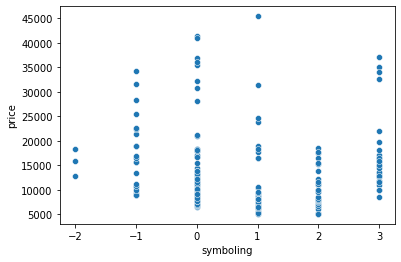

wheelbase


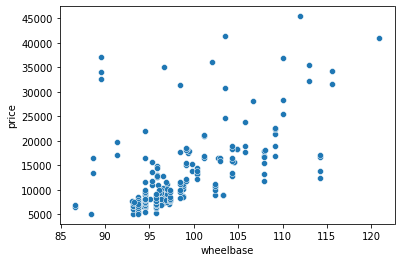

carlength


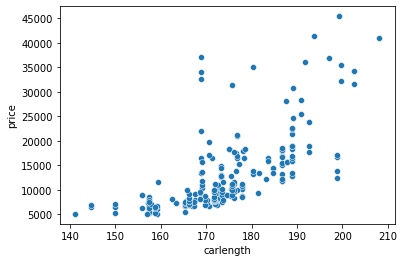

carwidth


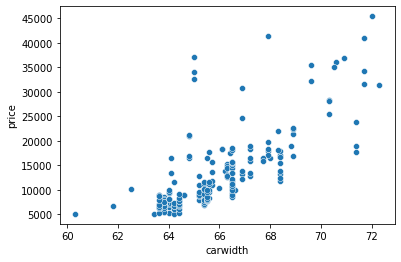

carheight


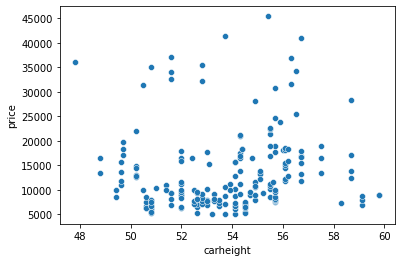

curbweight


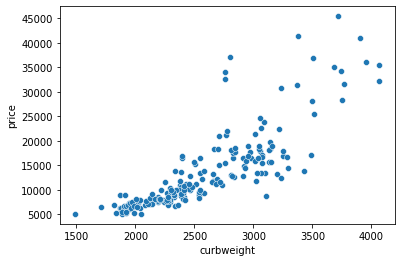

enginesize


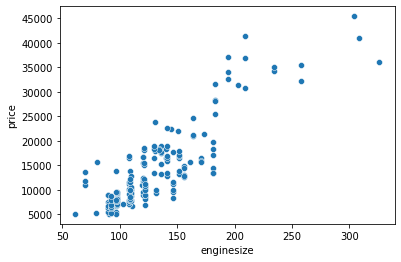

boreratio


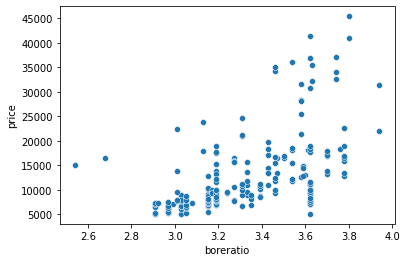

stroke


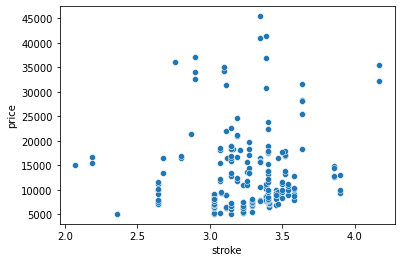

compressionratio


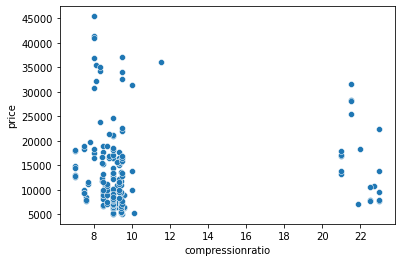

horsepower


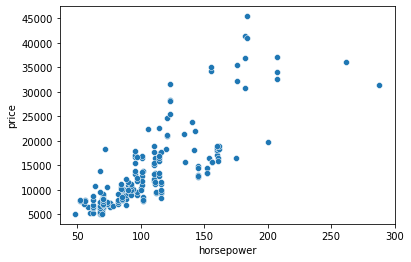

peakrpm


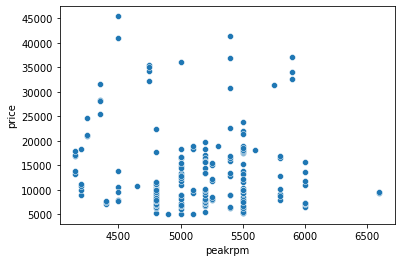

citympg


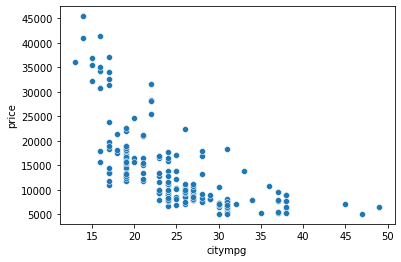

highwaympg


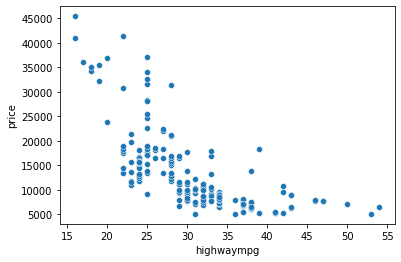

price


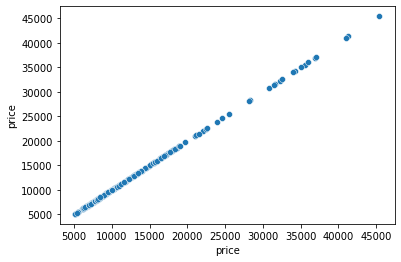

In [256]:
for i in df_num:
    print(i)
    sns.scatterplot(x=i, y='price', data=df1_encode)
    plt.show()

Here I can see many columns have linear relation ship with the target variable. Let's do some more research on that.

## Multivariate Analysis

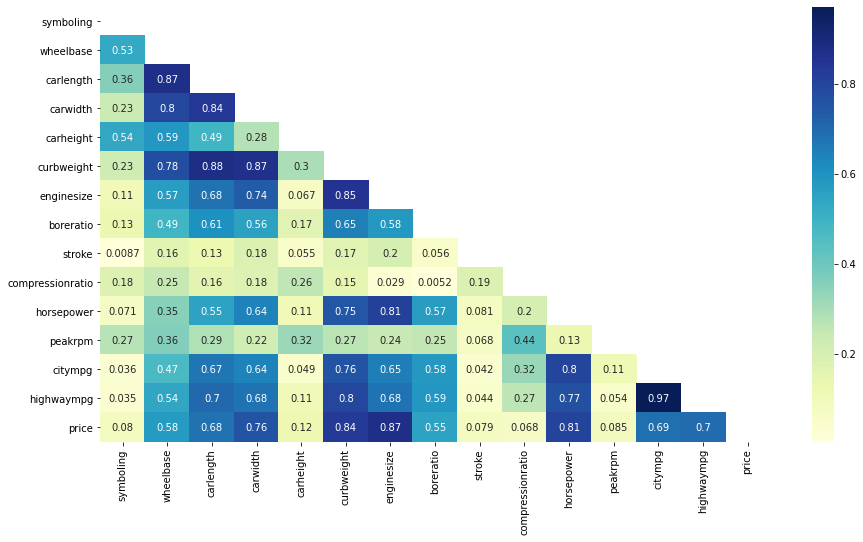

In [257]:
corr = df_num.corr()
plt.figure(figsize=(15,8))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(abs(corr), annot=True, cmap='YlGnBu', mask=mask)

Here I can see that 'citympg ' and 'highwaympg' have 97% of correlation. so we can remove one of them. but as these two are highly correlated. so we will remove one of them at this point, and we will remove the features which have less than 50% correlation with the target variable. 

In [268]:
df_num['mileage'] = 0.6*df_num['citympg'] + 0.4*df_num['highwaympg']
df_num['car_area'] = df_num['carlength']*df_num['carwidth']

In [269]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def get_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [270]:
get_vif(df_num[[i for i in df_num.describe().columns if i not in ['car_ID','price']]])

,variables,VIF
0,symboling,2.646796
1,wheelbase,2316.959780
2,carlength,6136.028870
3,carwidth,3170.397591
4,carheight,1108.503341
5,curbweight,415.172460
6,enginesize,68.941339
7,boreratio,326.471548
8,stroke,132.074737
9,compressionratio,16.465709


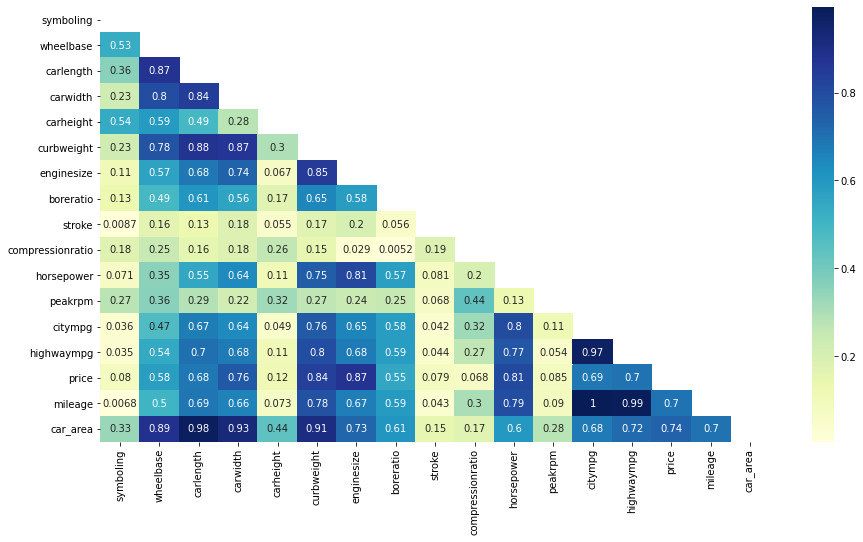

In [271]:
corr = df_num.corr()
plt.figure(figsize=(15,8))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(abs(corr), annot=True, cmap='YlGnBu', mask=mask)

In [272]:
get_vif(df_num[[i for i in df_num.describe().columns if i not in ['car_ID','price',"carlength","carwidth","citympg","highwaympg","carheight","wheelbase","car_area","horsepower","symboling","compressionratio","peakrpm","stroke","curbweight","boreratio"]]])

,variables,VIF
0,enginesize,4.271217
1,mileage,4.271217


In [274]:
df2_encode= df1_encode.drop(columns=["carlength","carwidth","citympg","highwaympg","carheight","CarName", "company","wheelbase","horsepower","symboling","compressionratio","peakrpm","stroke","curbweight","boreratio"], axis =1,inplace = True)

In [275]:
df2_encode = pd.DataFrame(df1_encode)

In [277]:
df2_encode.head(1)

,fueltype,aspiration,drivewheel,cylindernumber,enginesize,price,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_2bbl,fuelsystem_idi,fuelsystem_mpfi,fuelsystem_others,fuelsystem_spdi
0,0,0,1,4,130,13495.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


Now as we have removed the numerical variables on the basis of correlation. Now we will find the outliers and treat them. As from the univariate analysis we found 'horsepower', 'enginesize', 'highwaympg', 'wheelbase','carwidth','carlength' have outliers in them. 
## let's treat the outliers now 

In [280]:
X = df2_encode[['fueltype', 'aspiration', 'drivewheel',
       'cylindernumber', 'enginesize',
       
         'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon',
       
       'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf',
       'enginetype_ohcv', 'enginetype_rotor',
       'fuelsystem_2bbl', 'fuelsystem_idi',
        'fuelsystem_mpfi', 'fuelsystem_spdi'
       ]]

In [309]:
y = np.log10(df2_encode['price'])

In [310]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.2, random_state = 0) 
print(X_train.shape)
print(X_test.shape)

(164, 19)
(41, 19)


In [323]:
 from sklearn.preprocessing import StandardScaler

In [324]:
scaler = StandardScaler()

In [325]:
X_train_scaled = scaler.fit_transform(X_train)

In [326]:
X_test_scaled = scaler.transform(X_test)

Let's import the model which we want to apply, Linear Regression.

In [327]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, y_train)

In [328]:
reg.score(X_train, y_train)

0.8838879672635781

In [329]:
reg.coef_

array([ 1.27867389e-02,  9.59317843e-02,  7.01961526e-02,  1.42365125e-02,
        3.36317220e-03, -1.25332778e-01, -1.15572751e-01, -7.64993976e-02,
       -8.89851348e-02, -4.16333634e-17,  2.73347708e-02,  7.98354838e-02,
        8.79184507e-02, -6.50895207e-02,  3.55535823e-01, -3.07389750e-02,
        1.27867389e-02,  1.00299619e-01, -4.37137908e-02])

In [330]:
reg.intercept_

3.515596640504585

In [331]:
y_pred = reg.predict(X_test)

In [332]:
y_pred

array([3.81211512, 4.22399708, 4.14780633, 3.64448273, 4.04276417,
       4.18856431, 3.81547829, 3.84206591, 4.19958338, 3.84621727,
       4.32640782, 4.36713572, 4.08965094, 4.12231348, 3.8478253 ,
       4.19832434, 4.10763139, 4.13532059, 3.90675437, 3.81547829,
       3.95897236, 4.0974545 , 4.08104377, 4.19832434, 4.23104118,
       3.84037712, 3.87473068, 4.08496876, 3.83565732, 3.87136751,
       4.04276417, 4.03027843, 4.2151402 , 4.0864854 , 3.87136751,
       4.47775056, 4.11926356, 4.06014518, 3.80875195, 4.63196656,
       3.8478253 ])

In [333]:
y_test

52     3.832189
181    4.197281
5      4.183270
18     3.711892
188    3.999783
170    4.049179
76     3.731508
154    3.897517
104    4.235503
33     3.814847
12     4.321598
129    4.496937
55     4.039216
66     4.263494
45     3.950194
169    3.999522
130    3.968249
7      4.276921
37     3.897352
152    3.812111
80     3.998216
111    4.192567
131    3.995416
171    4.062544
179    4.204066
138    3.709100
156    3.841234
113    4.222586
161    3.922102
89     3.740284
183    3.901731
193    4.089552
125    4.342778
173    3.951726
92     3.835627
16     4.616108
189    4.064271
136    4.258877
22     3.804616
74     4.657056
44     3.950194
Name: price, dtype: float64

In [334]:
from sklearn.metrics import mean_squared_error
MSE  = mean_squared_error(y_test, y_pred)
print(MSE)

0.009767634094997939


In [335]:
RMSE = np.sqrt(MSE)
print(RMSE)

0.09883134166345178


In [336]:
from sklearn.metrics import r2_score
r2 = r2_score(y_pred, y_test)
print(r2)

0.7618177922597986


If the value of R2 is 0.76 then this suggests that 76.1% of the variation in Y can be explained with the help of given explanatory variables in that model. In other words, it explains the proportion of variation in the dependent variable that is explained by the independent variables.

On addition of a new variable the error is sure to decrease, thus R square always increases whenever a new variable is added to our model. This may not describe the importance of a variable

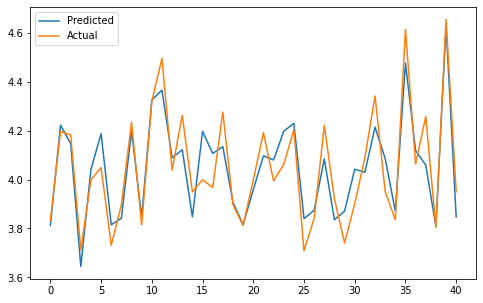

In [337]:
plt.figure(figsize=(8,5))
plt.plot(y_pred)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.show()

In [ ]:
## Now we can see the the actualy and predicted values. Although we got 76% accuracy, not that good. but we will keep on working to imporove it further. 